In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

#### Data Loading and Merging

In [2]:
import os

data_files = ['data_1.csv', 'data_2.csv', 'data_5.csv', 'data_6.csv', 'data_7.csv', 'data_8.csv','data_9.csv']
data_frames = []

for file in data_files:
    file_path = os.path.join('../data', file)  
    df = pd.read_csv(file_path)
    data_frames.append(df)

data = pd.concat(data_frames)

** APIFY was used to scrape the data

## EDA

In [3]:
def df_info(df):
    print(f"Data Shape: {df.shape}")
    df_chack = pd.DataFrame(df.dtypes, columns=['dtypes'])
    df_chack = df_chack.reset_index()
    df_chack['name'] = df_chack['index']
    df_chack = df_chack[['name', 'dtypes']]
    df_chack['isnull'] = df.isnull().sum().values
    df_chack['% null'] = round((df_chack['isnull']/len(df))*100,2)
    df_chack['num_unique'] = df.nunique().values
    df_chack['first_value'] = df.values[0]
    return df_chack


df_info(data)

Data Shape: (9821, 40)


,name,dtypes,isnull,% null,num_unique,first_value
0,authorName,object,54,0.55,8574,Lindsey L
1,googleMapsPlaceId,object,0,0.00,394,ChIJAQReQIdZwokR1rcwiar_XqM
2,placeAddress,object,1,0.01,466,"Orchard Grocer, 78 Orchard St, New York, NY 10..."
3,placeName,object,0,0.00,417,Orchard Grocer
4,placeUrl,object,0,0.00,487,https://page-service.doordash.com/store/orchar...
5,provider,object,0,0.00,4,door-dash
6,reviewDate,object,53,0.54,7298,2022-02-21T18:18:00.620Z
7,reviewId,object,2611,26.59,7030,NaN
8,reviewRating,float64,2177,22.17,5,5.0
9,reviewText,object,1545,15.73,7433,This is the best vegan breakfast I've had on d...


In [4]:
# Update the data types of reviewDate columns
data['reviewDate'] = pd.to_datetime(data['reviewDate']).dt.date #-->returns a Python date object (no time information)

data.head()

,authorName,googleMapsPlaceId,placeAddress,placeName,placeUrl,provider,reviewDate,reviewId,reviewRating,reviewText,...,reviewImages/18,reviewImages/19,reviewImages/20,reviewImages/21,reviewImages/22,reviewImages/23,reviewImages/24,reviewImages/25,reviewImages/26,reviewImages/27
0,Lindsey L,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2022-02-21,NaN,5.0,This is the best vegan breakfast I've had on d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mara R,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-12-19,NaN,5.0,"The Romey Sandwich is my repeat order, it's so...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yvette Y,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-10-13,NaN,1.0,The Orchard CThe Orchard Cobb Salad Salad was ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hugh M,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-07-22,NaN,5.0,The Bowery Sandwich was great! Delicious and h...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Erin L,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-04-11,NaN,5.0,edith is the best sandwich i've ever put in my...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = data.copy()
df.index = range(1, len(df)+1)
df = df.reset_index()
df.head()

,index,authorName,googleMapsPlaceId,placeAddress,placeName,placeUrl,provider,reviewDate,reviewId,reviewRating,...,reviewImages/18,reviewImages/19,reviewImages/20,reviewImages/21,reviewImages/22,reviewImages/23,reviewImages/24,reviewImages/25,reviewImages/26,reviewImages/27
0,1,Lindsey L,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2022-02-21,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Mara R,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-12-19,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Yvette Y,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-10-13,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Hugh M,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-07-22,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Erin L,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-04-11,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

In [6]:
# Drop columns with less than 10 imaged
for num in range(13, 28):
    name_column = f"reviewImages/{num}"
    if name_column in df.columns:
        df.drop(name_column, axis=1, inplace=True)

<Axes: >

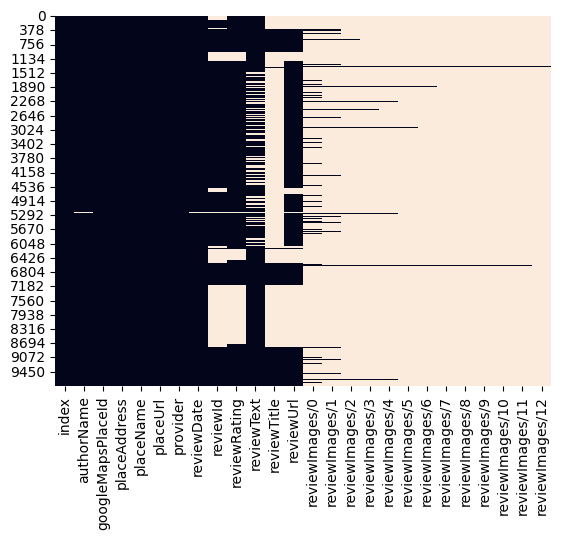

In [7]:
# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False)

At first sight, it appears like the majority of the important columns are not missing data.

In [8]:
# Drop rows with missing reviewText
df = df.dropna(subset=['reviewText'], axis=0)

# Drop reviewId column since there is an index column
df.drop('reviewId', axis=1, inplace=True)

In [9]:
def create_place_review_pivot(df):
    # Count places per provider
    provider_place_counts = df.groupby(['provider', 'placeName']).size().reset_index(name='place_count')
    # Count reviews per place
    place_review_counts = df.groupby(['provider', 'placeName'])['reviewText'].count().reset_index(name='review_count')
    # Merge the two dataframes
    merged_counts = pd.merge(provider_place_counts, place_review_counts, on=['provider', 'placeName'])
    
    pivot = pd.pivot_table(
        merged_counts, 
        values='review_count',
        index='placeName',
        columns='provider',
        aggfunc='sum',
        fill_value=0
    )
    
    pivot['Total_Reviews'] = pivot.sum(axis=1)
    pivot = pivot.sort_values(by='Total_Reviews', ascending=False)
    
    return pivot


create_place_review_pivot(df)

provider,door-dash,google-maps,tripadvisor,uber-eats,Total_Reviews
placeName,,,,,
Home Frite,349,7,0,250,606
Red Lobster,0,397,0,0,397
Dhaba,0,87,258,0,345
BXL Cafe,0,5,240,0,245
cafeteria,0,0,240,0,240
...,...,...,...,...,...
The Grazing Box,0,1,0,0,1
The Fulton,1,0,0,0,1
ANDO patisserie,0,1,0,0,1


In [10]:
# Number of unique reviews per place
df.groupby('placeName')['reviewText'].nunique().sort_values(ascending=False).head(20)

placeName
Home Frite                                             432
Red Lobster                                            394
Dhaba                                                  338
BXL Cafe                                               245
cafeteria                                              239
Lorenzo's Restaurant & Cabaret                         209
Mille-Feuille Bakery                                   181
Bodrum                                                 178
Martha's Country Bakery - Bayside                      146
Randolph Beer                                          106
Bistro Vendome                                         100
Wynkoop Brewing Company                                100
World Famous Dark Horse Bar                            100
The Pub On The Bricks                                   99
McDonald's® (Brookville (Conduit Ave))                  96
Tex's Chicken & Burgers (244-35 Merrick - Rosedale)     93
Priya's Indian Kitchen                        

#### Finding Duplication

In [11]:
duplicate_reviews = df[df.duplicated(subset=['reviewText','authorName','reviewDate','provider'], keep=False)].sort_values(by='reviewText')
duplicate_reviews

,index,authorName,googleMapsPlaceId,placeAddress,placeName,placeUrl,provider,reviewDate,reviewRating,reviewText,...,reviewImages/3,reviewImages/4,reviewImages/5,reviewImages/6,reviewImages/7,reviewImages/8,reviewImages/9,reviewImages/10,reviewImages/11,reviewImages/12
6106,6107,Tiffanie L,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-04-23,1.0,The Orchard Cobb Salad was nothing more than ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8755,8756,Tiffanie L,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-04-23,1.0,The Orchard Cobb Salad was nothing more than ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Tiffanie L,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-04-23,1.0,The Orchard Cobb Salad was nothing more than ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6535,6536,Tiffanie L,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-04-23,1.0,The Orchard Cobb Salad was nothing more than ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,44,Malèah D,ChIJl0yGbJRbwokRU009ugxm0CA,"1047 Bedford Ave, Brooklyn, NY 11216, USA",Home Frite,https://page-service.doordash.com/store/home-f...,door-dash,2023-09-30,5.0,10/10 my fav burger spot. I eat here at least ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,4718,Liz D,ChIJl0yGbJRbwokRU009ugxm0CA,"1047 Bedford Ave, Brooklyn, NY 11216, USA",Home Frite,https://page-service.doordash.com/store/home-f...,door-dash,2023-01-29,1.0,this was actually the worst cheese burger ive ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,99,Damonn M,ChIJl0yGbJRbwokRU009ugxm0CA,"1047 Bedford Ave, Brooklyn, NY 11216, USA",Home Frite,https://page-service.doordash.com/store/home-f...,door-dash,2024-10-08,2.0,"very salty, messy presentation",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4653,4654,Damonn M,ChIJl0yGbJRbwokRU009ugxm0CA,"1047 Bedford Ave, Brooklyn, NY 11216, USA",Home Frite,https://page-service.doordash.com/store/home-f...,door-dash,2024-10-08,2.0,"very salty, messy presentation",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7328,7329,Njoki K.,ChIJja9U72tkwokRow60T1oxMBk,"750 Sunrise Hwy 5 Green Acres Common, Valley S...",BJ's Restaurant & Brewhouse (Valley Stream #581),https://www.ubereats.com/store/bjs-restaurant-...,uber-eats,2023-04-19,NaN,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A duplication is a row that has more than one occurrence according to the following columns `reviewText`,`authorName`,`reviewDate`,`provider`.

This is most likely the result of scarpping overlap. 

In [12]:
df = df.drop_duplicates(subset=['reviewText', 'authorName', 'reviewDate', 'provider'], keep='first')
df.to_csv('../data/cleaned_data.csv', index=False)
print("DataFrame After Cleaning")
df_info(df)

DataFrame After Cleaning
Data Shape: (7857, 25)


,name,dtypes,isnull,% null,num_unique,first_value
0,index,int64,0,0.00,7857,1
1,authorName,object,1,0.01,7199,Lindsey L
2,googleMapsPlaceId,object,0,0.00,319,ChIJAQReQIdZwokR1rcwiar_XqM
3,placeAddress,object,0,0.00,384,"Orchard Grocer, 78 Orchard St, New York, NY 10..."
4,placeName,object,0,0.00,342,Orchard Grocer
5,placeUrl,object,0,0.00,400,https://page-service.doordash.com/store/orchar...
6,provider,object,0,0.00,4,door-dash
7,reviewDate,object,0,0.00,2642,2022-02-21
8,reviewRating,float64,2034,25.89,5,5.0
9,reviewText,object,0,0.00,7433,This is the best vegan breakfast I've had on d...


#### Saving Clean Data

In [21]:
cleaned_data = df.to_csv('../data/cleaned_data.csv')

#### Data Distribution

<Axes: title={'center': 'Distribution of Reviews by Source'}, ylabel='count'>

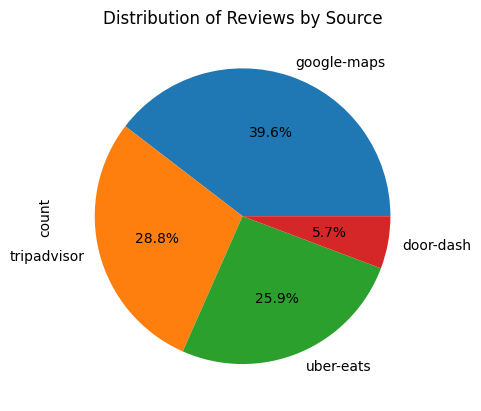

In [13]:
df['provider'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution of Reviews by Source')

Text(0.5, 1.0, 'Review Length Distribution')

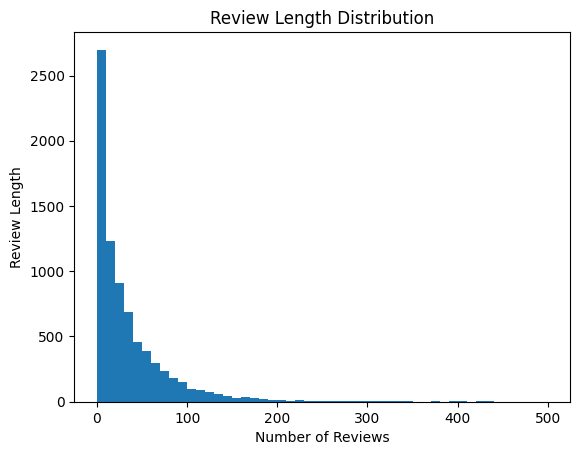

In [17]:
df['reviewText'].str.split().str.len().plot(kind='hist', bins=50, range=(0, 500))
plt.xlabel('Number of Reviews')
plt.ylabel('Review Length')
plt.title('Review Length Distribution')

In [18]:
# Average review length
df['reviewText'].str.len().mean().round(2)

np.float64(202.77)

<Axes: title={'center': 'Review Rating Distribution'}, ylabel='Frequency'>

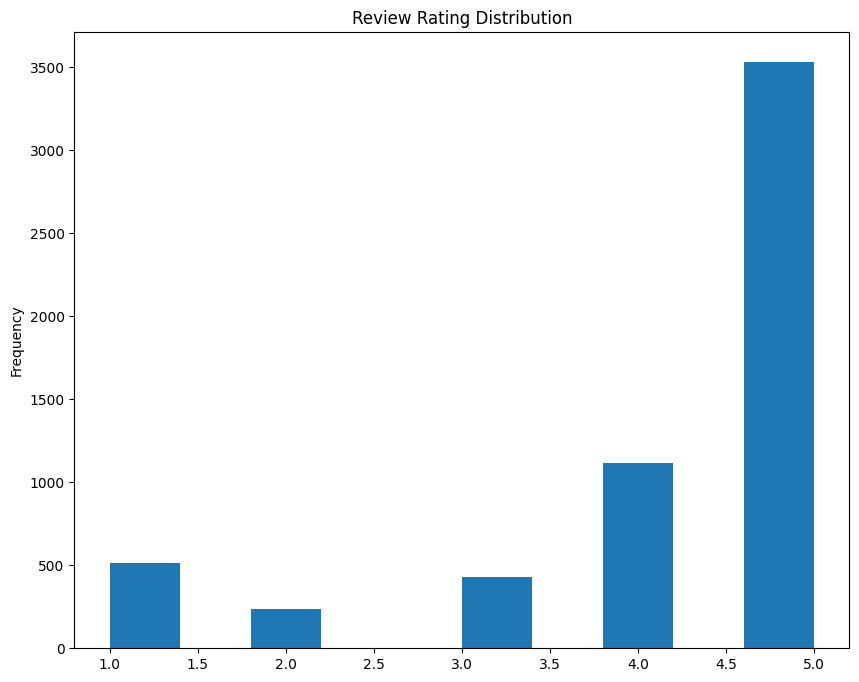

In [19]:
df['reviewRating'].plot.hist(figsize=(10,8), title='Review Rating Distribution')

Seems like the majority of the data is rank 5 star, which may indicate on positive reviews biased

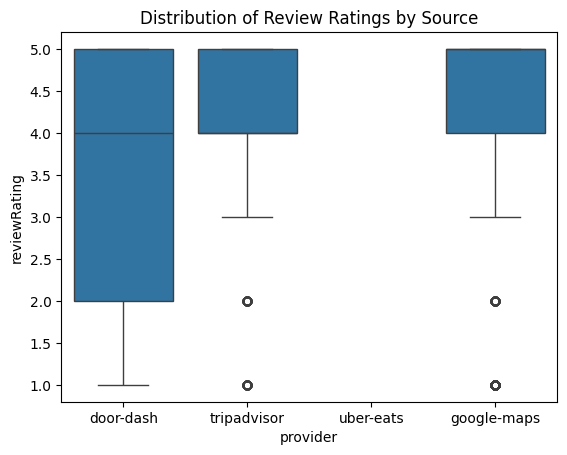

In [20]:
sns.boxplot(x='provider', y='reviewRating', data=df)
plt.title('Distribution of Review Ratings by Source')
plt.show()

- Uber Eats does not provide a rating method for its reviews.
- Tripadvisor and Google Maps have similar rating distributions.
- Door Dash has the most variable ratings.